# Data Modeling and Analysis

This Notebook will model the data and gather insights. This will include:
- Data Exploration
- Data Visualization
- Conclusions


Notes to self:


## Import Data

In [1]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from datetime import datetime

## Sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud
from wordcloud import WordCloud


#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('../3_ANALYSIS/data/processed_data.csv')

print(df.shape)
df.head()

(3735, 78)


,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_thearmorylife.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.666290,-0.237698,-0.237698,0,1,...,1,0,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.563819,-0.263742,-0.263742,0,1,...,1,0,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.666290,-0.250720,-0.250720,0,1,...,1,0,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.163518,-0.224675,-0.224675,0,1,...,1,0,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.666290,-0.250720,-0.250720,0,1,...,1,0,0,0,0,0,0,0,22,5


In [3]:
mh_df = df[df['subreddit'].isin(['schizophrenia', 'bipolar'])]

mh_df.head()

,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_thearmorylife.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
1869,schizophrenia,I think I'm in danger of actually hurting some...,I think I'm going to lose it,[],r/schizophrenia,0.66629,-0.263742,-0.263742,0,1,...,0,0,1,0,0,0,0,0,2,0
1870,schizophrenia,Holidays blow. Brain blows. Got money saved up...,Taking the jump.,[],r/schizophrenia,0.66629,-0.250720,-0.250720,0,1,...,0,0,1,0,0,0,0,0,2,0
1871,schizophrenia,"Hope you’re all having happy, stress free, hol...",Happy Selfie-Sunday!,[],r/schizophrenia,0.66629,-0.237698,-0.237698,0,0,...,0,0,0,0,0,0,0,0,2,0
1872,schizophrenia,This is my first time posting here. I’ve been ...,Merry Christmas and don’t forget to thank your...,[],r/schizophrenia,0.66629,-0.263742,-0.263742,0,0,...,0,0,0,0,0,0,0,0,0,0
1873,schizophrenia,I noticed development of my symptoms today but...,Selfie Sunday,[],r/schizophrenia,0.66629,-0.263742,-0.263742,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
def preprocess_text(text):
    '''
    This function is performing text cleaning in order to prepare the text for NLP analysis.
    This includes:
    - Lowercasing
    - Removing special characters and digits
    - Tokenizing into words
    - Removing stopwords
    - Lemmatization
    
    Returns: Cleaned text
    
    '''
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


In [6]:
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    ''' 
    This function is performing text preprocessing and vectorization for NLP analysis.
    
    Parameters:
    - df: dataframe
    - text_column: column containing text data
    - target_column: column containing target variable
    
    
    Returns: X_train_vect, X_test_vect, y_train, y_test, vectorizer
    '''
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [7]:
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(mh_df)

### Reviewing Aggregate Word Cloud

In [8]:
tdidf_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print(tdidf_df)

       _h  _qbdc  _zs   ab  abandoned  abandonment  abilify  ability  \
0     0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
1     0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
2     0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
3     0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
4     0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
...   ...    ...  ...  ...        ...          ...      ...      ...   
1487  0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
1488  0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
1489  0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
1490  0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   
1491  0.0    0.0  0.0  0.0        0.0          0.0      0.0      0.0   

          able  abnormal  ...  yup  zero  zinc  zoloft  zombie  zone  zoning  \
0     0.000000  0.000000  ...  0.0   0.0   0.0     0.0 

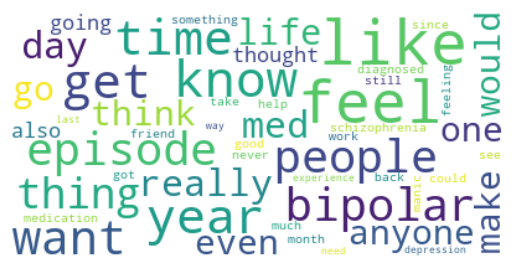

In [9]:
# Sum the TF-IDF scores for each word
word_frequencies = tdidf_df.sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50, random_state=42).generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Training for Logistical Regression Model

In [10]:
# Initialize the model
lrg = LogisticRegression()

# Train the model
lrg.fit(X_train, y_train)


LogisticRegression()

               precision    recall  f1-score   support

      bipolar       0.82      0.93      0.87       204
schizophrenia       0.90      0.75      0.82       170

     accuracy                           0.85       374
    macro avg       0.86      0.84      0.85       374
 weighted avg       0.86      0.85      0.85       374



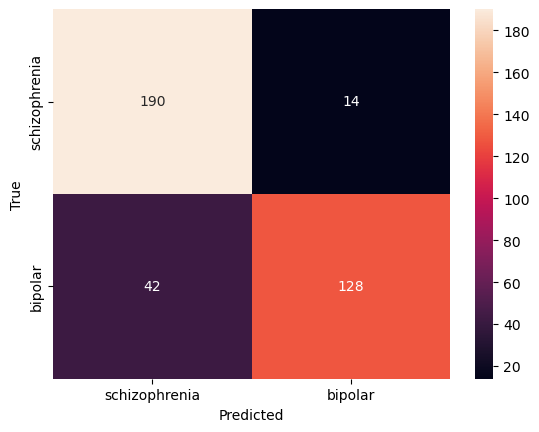

In [11]:
# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Plot confusion matrix
cm_lrg = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lrg,
            annot=True,
            fmt='d',
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2', 'elasticnet', None],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs': [-1]}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)


/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

C                    0.1
class_weight    balanced
max_iter             100
multi_class         auto
n_jobs                -1
penalty             None
random_state          42
solver             lbfgs
dtype: object

               precision    recall  f1-score   support

      bipolar       0.81      0.89      0.85       204
schizophrenia       0.85      0.74      0.79       170

     accuracy                           0.82       374
    macro avg       0.83      0.82      0.82       374
 weighted avg       0.83      0.82      0.82       374



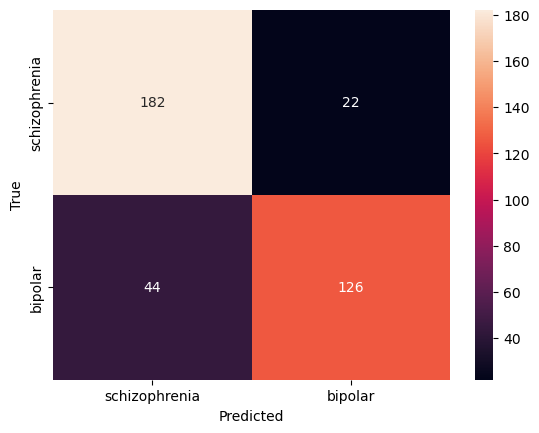

In [13]:
# Print best parameters
print(pd.Series(grid_search.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_lr))

# Plot confusion matrix
cm_lrg_best = confusion_matrix(y_test, y_pred_best_lr)
sns.heatmap(cm_lrg_best,
            annot=True,
            fmt='d', 
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [14]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_[0] #Becuase this is a binary classification problem, there are only 2 classes. Therefore, we only need to look at the first row of coefficients.

for _, class_label in enumerate(lrg.classes_): #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    sorted_indices = np.argsort(coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: bipolar
Top Positive Influential Words: ['see', 'invega', 'psychotic', 'free', 'risperidone', 'hearing', 'negative', 'head', 'guy', 'abilify', 'paranoid', 'doctor', 'hear', 'psychosis', 'symptom', 'delusion', 'schizophrenic', 'hallucination', 'voice', 'schizophrenia']
Top Negative Influential Words: ['bipolar', 'manic', 'episode', 'mania', 'depression', 'feel', 'relationship', 'hypomanic', 'mood', 'feeling', 'depressive', 'week', 'last', 'holiday', 'another', 'need', 'love', 'depressed', 'done', 'anyone']

Class: schizophrenia
Top Positive Influential Words: ['see', 'invega', 'psychotic', 'free', 'risperidone', 'hearing', 'negative', 'head', 'guy', 'abilify', 'paranoid', 'doctor', 'hear', 'psychosis', 'symptom', 'delusion', 'schizophrenic', 'hallucination', 'voice', 'schizophrenia']
Top Negative Influential Words: ['bipolar', 'manic', 'episode', 'mania', 'depression', 'feel', 'relationship', 'hypomanic', 'mood', 'feeling', 'depressive', 'week', 'last', 'holiday', 'another', 'nee

### Word Clouds for Positive and Negative Posts

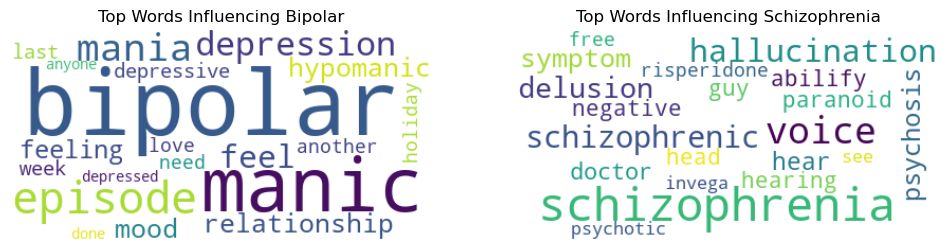

In [15]:
# For Class A (Positive Coefficients)
top_words_schizo = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}

# For Class B (Negative Coefficients)
top_words_bipolar = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}

# Word Cloud for Class A
wordcloud_bipolar = WordCloud(background_color='white').generate_from_frequencies(top_words_bipolar)

# Word Cloud for Class B
wordcloud_schizo = WordCloud(background_color='white').generate_from_frequencies(top_words_schizo)

# Display Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_bipolar, interpolation='bilinear')
plt.title('Top Words Influencing Bipolar')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_schizo, interpolation='bilinear')
plt.title('Top Words Influencing Schizophrenia')
plt.axis("off")

plt.show()

## Training for Naive Bayes Regression Model

In [16]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

               precision    recall  f1-score   support

      bipolar       0.64      0.99      0.78       204
schizophrenia       0.95      0.34      0.50       170

     accuracy                           0.69       374
    macro avg       0.80      0.66      0.64       374
 weighted avg       0.78      0.69      0.65       374



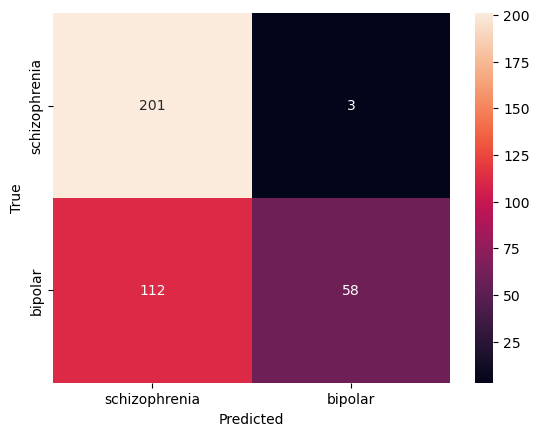

In [17]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_mnb))

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
# Define a parameter grid for GridSearch
param_grid_mnb = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
    }

# Initialize and perform the grid search
grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid = param_grid_mnb, cv=5)
grid_search_mnb.fit(X_train, y_train)



# Re-evaluate using the best model
best_model = grid_search_mnb.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)


Best Parameters:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': -1, 'penalty': None, 'random_state': 42, 'solver': 'lbfgs'}
               precision    recall  f1-score   support

      bipolar       0.75      0.90      0.82       204
schizophrenia       0.85      0.65      0.73       170

     accuracy                           0.79       374
    macro avg       0.80      0.77      0.78       374
 weighted avg       0.80      0.79      0.78       374



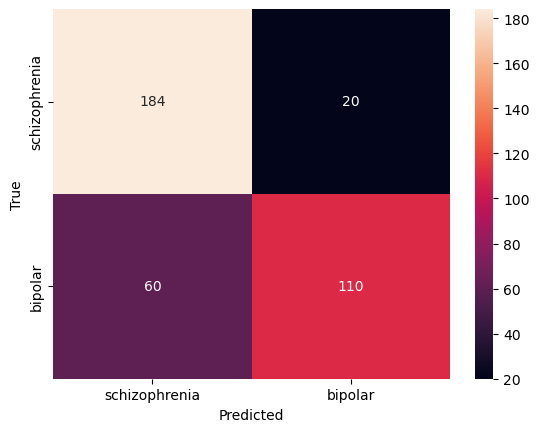

In [19]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

#Print classification report
print(classification_report(y_test, y_pred_best_mnb))

# Plot the confusion matrix
cm_mnb_best = confusion_matrix(y_test, y_pred_best_mnb)
sns.heatmap(cm_mnb_best,
            annot=True,
            fmt='d',
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [20]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: bipolar
Top Influential Words: ['feeling', 'even', 'depression', 'one', 'anyone', 'thing', 'day', 'really', 'life', 'med', 'manic', 'want', 'time', 'know', 'year', 'get', 'episode', 'bipolar', 'feel', 'like']

Class: schizophrenia
Top Influential Words: ['go', 'really', 'one', 'day', 'make', 'thought', 'symptom', 'would', 'thing', 'think', 'year', 'want', 'get', 'voice', 'time', 'know', 'people', 'feel', 'schizophrenia', 'like']



## Training for Random Forest Classifier Model

In [21]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

               precision    recall  f1-score   support

      bipolar       0.76      0.90      0.83       204
schizophrenia       0.85      0.66      0.75       170

     accuracy                           0.79       374
    macro avg       0.81      0.78      0.79       374
 weighted avg       0.80      0.79      0.79       374



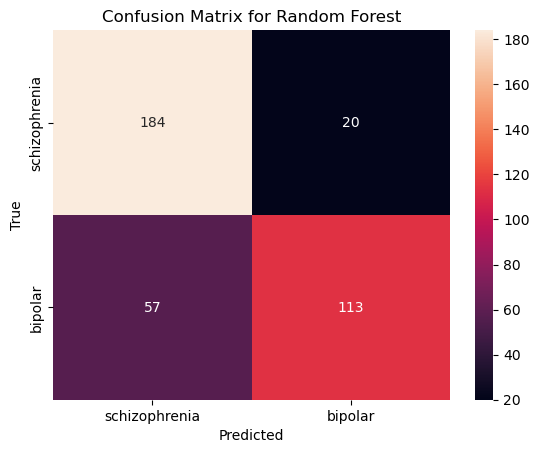

In [22]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features (Not separated by class)

top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Features and Words:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top Features and Words:
feeling: 0.0048964323703785595
mood: 0.004957284390724008
week: 0.0052330240071151056
need: 0.005496912308347869
year: 0.0055734882639024595
get: 0.005683207267737678
hypomanic: 0.0058196340948938104
mania: 0.005872397759329303
like: 0.005948105445448639
anyone: 0.0062345094981536035
hallucination: 0.0071015087999848035
last: 0.007135389145166413
feel: 0.008463608558337433
schizophrenic: 0.008766574741159085
depression: 0.009043564220845386
voice: 0.011804825537240408
episode: 0.01393364132122328
manic: 0.02152422313620568
schizophrenia: 0.02609748746675341
bipolar: 0.0332417216150292


In [24]:
# Define parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)

max_depth             20
min_samples_leaf       1
min_samples_split     10
n_estimators         200
dtype: int64

               precision    recall  f1-score   support

      bipolar       0.78      0.92      0.84       204
schizophrenia       0.87      0.69      0.77       170

     accuracy                           0.81       374
    macro avg       0.83      0.80      0.81       374
 weighted avg       0.82      0.81      0.81       374



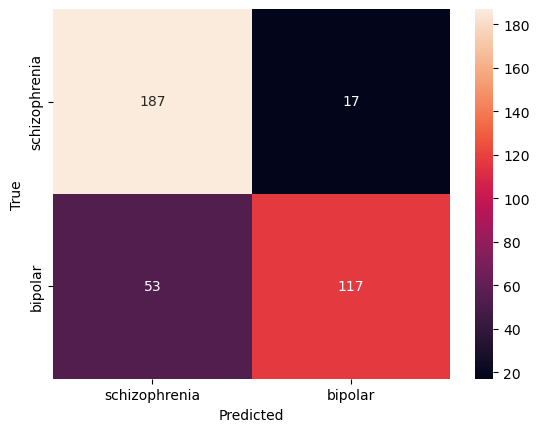

In [25]:
# Print best parameters
print(pd.Series(grid_search_rf.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_rf))

# Plot confusion matrix
cm_rf_best = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf_best,
            annot=True,
            fmt='d', 
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for KNN Model

In [26]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Classification Report:
               precision    recall  f1-score   support

      bipolar       0.00      0.00      0.00       204
schizophrenia       0.45      1.00      0.62       170

     accuracy                           0.45       374
    macro avg       0.23      0.50      0.31       374
 weighted avg       0.21      0.45      0.28       374



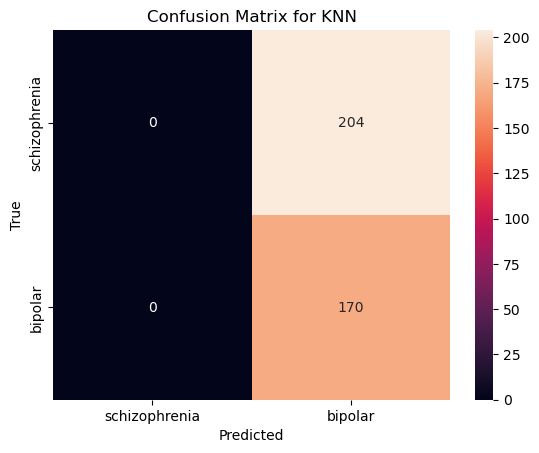

As you can see if we process the KNN the same way as the other models, we get a very low accuracy score. This is because the KNN model is very sensitive to the scale of the data. We will need to scale the data before we can run the model.


In [27]:

# Make predictions
y_pred_knn = knn.predict(X_test) 

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('As you can see if we process the KNN the same way as the other models, we get a very low accuracy score. This is because the KNN model is very sensitive to the scale of the data. We will need to scale the data before we can run the model.')

In [28]:
# Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model with GridSearch for parameter tuning
knn_params = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_scaled = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_scaled, knn_params, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Best KNN model
best_knn = grid_search.best_estimator_

metric         euclidean
n_neighbors            2
weights          uniform
dtype: object

Classification Report:
               precision    recall  f1-score   support

      bipolar       0.74      0.90      0.81       204
schizophrenia       0.83      0.62      0.71       170

     accuracy                           0.77       374
    macro avg       0.79      0.76      0.76       374
 weighted avg       0.78      0.77      0.76       374

Accuracy: 0.7700534759358288


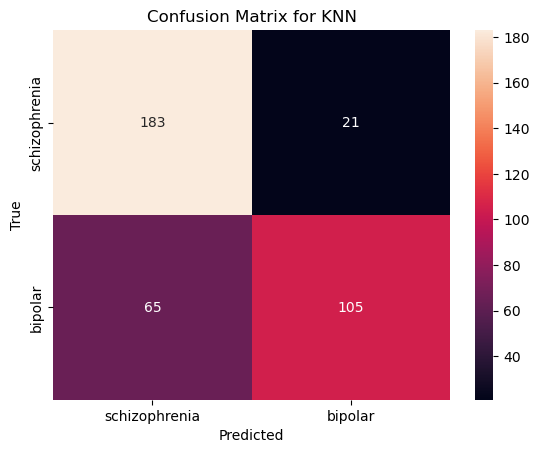

In [29]:

# Make predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Print best parameters
print(pd.Series(grid_search_knn.best_params_))
print()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for Gradient Boosting Model

In [30]:
# Initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

               precision    recall  f1-score   support

      bipolar       0.80      0.83      0.82       204
schizophrenia       0.79      0.75      0.77       170

     accuracy                           0.79       374
    macro avg       0.79      0.79      0.79       374
 weighted avg       0.79      0.79      0.79       374



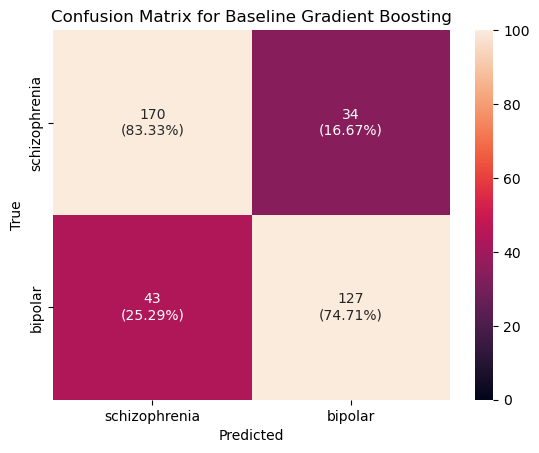

In [31]:

# Make predictions
y_pred_gb_mh = gb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_gb_mh))
#Export classification report to CSV
report = classification_report(y_test, y_pred_gb_mh, output_dict=True)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report).T
# Save the DataFrame to a CSV file
report_df.to_csv('../4_CONCLUSIONS_VIZ/files/classification_report_base_gb_mh.csv')

# Confusion matrix calculation
cm_gb_mh = confusion_matrix(y_test, y_pred_gb_mh)

# Convert confusion matrix to percentages
cm_gb_mh_percent = cm_gb_mh / cm_gb_mh.sum(axis=1).reshape(-1,1) * 100

# Create combined matrix with counts and percentages
combined_cm_mh = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_gb_mh, cm_gb_mh_percent)]) #REF: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


# Confusion matrix for Gradient Boosting
sns.heatmap(cm_gb_mh, annot=combined_cm_mh, fmt='', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'], vmin=0, vmax=100)
plt.title('Confusion Matrix for Baseline Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
# Variables

importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[-20:]  # Top 20 features

top_features_gb = [(feature_names[i], importances_gb[i]) for i in indices_gb]
print("Top Features and Words for Gradient Boosting:")
for feature, importance in top_features_gb:
    print(f"{feature}: {importance}")

Top Features and Words for Gradient Boosting:
schizo: 0.005816175987265491
last: 0.005992538756910603
psychosis: 0.006316542098093759
going: 0.006453758960063266
mania: 0.006989946461007719
anyone: 0.008429749710762652
schizoaffective: 0.009112730827482944
year: 0.009505664205289565
week: 0.010045427337512255
relationship: 0.01093959570583644
holiday: 0.01112176695596694
hallucination: 0.013646837624424802
depression: 0.016200759237699265
feel: 0.030039064631194143
schizophrenic: 0.03632653864264793
episode: 0.04290065358634941
voice: 0.05586526076933785
manic: 0.07735730480985592
bipolar: 0.1911244666442318
schizophrenia: 0.2485258373333037


In [33]:
# Define parameter grid for GridSearch
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize Grid Search
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_gb = grid_search_gb.best_estimator_
y_pred_best_gb = best_model_gb.predict(X_test)

Best Parameters for Gradient Boosting:
learning_rate          0.1
max_depth              5.0
min_samples_leaf       1.0
min_samples_split      2.0
n_estimators         200.0
dtype: float64

Classification Report for Best Gradient Boosting Model:
               precision    recall  f1-score   support

      bipolar       0.81      0.83      0.82       204
schizophrenia       0.79      0.77      0.78       170

     accuracy                           0.80       374
    macro avg       0.80      0.80      0.80       374
 weighted avg       0.80      0.80      0.80       374



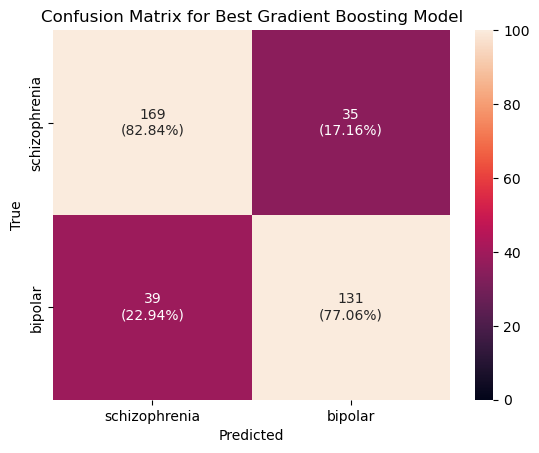

In [34]:
# Print best parameters
print("Best Parameters for Gradient Boosting:")
print(pd.Series(grid_search_gb.best_params_))
print()

# Print classification report for the best model
print("Classification Report for Best Gradient Boosting Model:")
print(classification_report(y_test, y_pred_best_gb))

#Export classification report to CSV
report = classification_report(y_test, y_pred_best_gb, output_dict=True)
# Convert the report to a DataFrame
report_df = pd.DataFrame(report).T
# Save the DataFrame to a CSV file
report_df.to_csv('../4_CONCLUSIONS_VIZ/files/classification_report_best_gb_mh.csv')

# Confusion matrix calculation
cm_gb_best = confusion_matrix(y_test, y_pred_best_gb)

# Convert confusion matrix to percentages
cm_gb_mh_percent_best = cm_gb_best / cm_gb_best.sum(axis=1).reshape(-1,1) * 100

# Create combined matrix with counts and percentages
combined_cm_best = np.array([["{}\n({:.2f}%)".format(count, percent) for count, percent in zip(row_count, row_percent)] 
                        for row_count, row_percent in zip(cm_gb_best, cm_gb_mh_percent_best)]) #REF: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea


# Plot confusion matrix for the best model
sns.heatmap(cm_gb_best,
            annot=combined_cm_best,
            fmt='', 
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'],
            vmin=0,
            vmax=100)
plt.title('Confusion Matrix for Best Gradient Boosting Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Summary of Models

In [35]:
# Variables
today_date = datetime.now().strftime("%Y-%m-%d")

# Check if the CSV file exists
if os.path.exists("./data/model_performance_history_mentalhealth.csv"):
    # Load the existing DataFrame
    model_comparison_df = pd.read_csv("./data/model_performance_history_mentalhealth.csv")
else:
    # Initialize a new DataFrame if the file does not exist
    model_comparison_df = pd.DataFrame()

# Capture the best scores and parameters for each model
new_data = {
    "Model": ["Logistic Regression", "Multinomial Naive Bayes", "Random Forest", "KNN", "Gradient Boosting"],
    f"{today_date}_Score": [
        grid_search.best_score_,
        grid_search_mnb.best_score_,
        grid_search_rf.best_score_,
        grid_search_knn.best_score_,
        grid_search_gb.best_score_
    ],
    f"{today_date}_Params": [
        str(grid_search.best_params_),
        str(grid_search_mnb.best_params_),
        str(grid_search_rf.best_params_),
        str(grid_search_knn.best_params_),
        str(grid_search_gb.best_params_)
    ]
}

# Convert new data to DataFrame
new_data_df = pd.DataFrame(new_data)

# Update the existing DataFrame with the new data
model_comparison_df = pd.concat([model_comparison_df, new_data_df], axis=0)

# Sort the DataFrame by the highest best score for the current run
model_comparison_df = model_comparison_df.sort_values(by=f"{today_date}_Score", ascending=False)

# Save the DataFrame to a CSV file
model_comparison_df.to_csv("./data/model_performance_history_mentalhealth.csv", index=False)

# Display the DataFrame
model_comparison_df

,Model,2024-01-05_Score,2024-01-05_Params,2024-01-06_Score,2024-01-06_Params,2024-01-07_Score,2024-01-07_Params,2024-01-14_Score,2024-01-14_Params
4,Gradient Boosting,NaN,NaN,NaN,NaN,NaN,NaN,0.870638,"{'learning_rate': 0.1, 'max_depth': 5, 'min_sa..."
0,Logistic Regression,NaN,NaN,NaN,NaN,NaN,NaN,0.847842,"{'C': 0.1, 'class_weight': 'balanced', 'max_it..."
2,Random Forest,NaN,NaN,NaN,NaN,NaN,NaN,0.835133,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
1,Multinomial Naive Bayes,NaN,NaN,NaN,NaN,NaN,NaN,0.817030,"{'alpha': 0.1, 'class_prior': None, 'fit_prior..."
3,KNN,NaN,NaN,NaN,NaN,NaN,NaN,0.441020,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei..."
0,Gradient Boosting,NaN,NaN,NaN,NaN,0.860314,"{'learning_rate': 0.2, 'max_depth': 3, 'min_sa...",NaN,NaN
1,Logistic Regression,NaN,NaN,NaN,NaN,0.844045,"{'C': 0.1, 'class_weight': 'balanced', 'max_it...",NaN,NaN
2,Random Forest,NaN,NaN,NaN,NaN,0.840380,"{'max_depth': 30, 'min_samples_leaf': 2, 'min_...",NaN,NaN
3,Multinomial Naive Bayes,NaN,NaN,NaN,NaN,0.810045,"{'alpha': 0.1, 'class_prior': None, 'fit_prior...",NaN,NaN
4,KNN,NaN,NaN,NaN,NaN,0.430152,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",NaN,NaN


In [36]:
# Gather the influencing words for each class
top_words_schizo = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}
top_words_bipolar = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}
top_words_mnb_schizo = {feature_names[i]: abs(log_prob[0][i]) for i in sorted_indices[-20:]}
top_words_mnb_bipolar = {feature_names[i]: abs(log_prob[1][i]) for i in sorted_indices[:20]}
top_words_rf = {feature_names[i]: abs(importances[i]) for i in indices}
top_words_gb = {feature_names[i]: abs(importances_gb[i]) for i in indices_gb}

# Create a list of all unique words from all dictionaries
unique_words = set(top_words_schizo.keys()).union(top_words_bipolar.keys(),
                   top_words_mnb_schizo.keys(), top_words_mnb_bipolar.keys(),
                   top_words_rf.keys(), top_words_gb.keys())

# Convert the set to a list for ordering
unique_words_list = list(unique_words)

# Initialize a DataFrame with these unique words as the index
top_words_df = pd.DataFrame(index=unique_words_list)

# Populate the DataFrame with the values from the dictionaries
top_words_dict = {
    "Logistic Regression_Schizophrenia": top_words_schizo,
    "Logistic Regression_Bipolar": top_words_bipolar,
    "Multinomial Naive Bayes_Schizophrenia": top_words_mnb_schizo,
    "Multinomial Naive Bayes_Bipolar": top_words_mnb_bipolar,
    "Random Forest": top_words_rf,
    "Gradient Boosting": top_words_gb
}

for column_name, words_dict in top_words_dict.items():
    top_words_df[column_name] = top_words_df.index.map(words_dict).fillna(0)

# Display the DataFrame
print(top_words_df.shape)
top_words_df

top_words_df.to_csv("./data/top_words_mentalhealth.csv", index=False)

(60, 6)
